<a href="https://colab.research.google.com/github/jskyscraper/bionic/blob/main/BIONIC_Skills_Week_1_Neural_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIONIC - Week 1 - Neural Systems

## Artificial Neural Networks

### Lecture Review - Basic Concepts  


Hopefully you have all watched the lecture and are aware of how an Artificial Neural Network (ANN) works and the different types that exist. Important concepts for this lab class, make sure you understand these concepts: 

* Node  

* Weights 

* Bias 

* Activation Function 

* Input 

* Output 

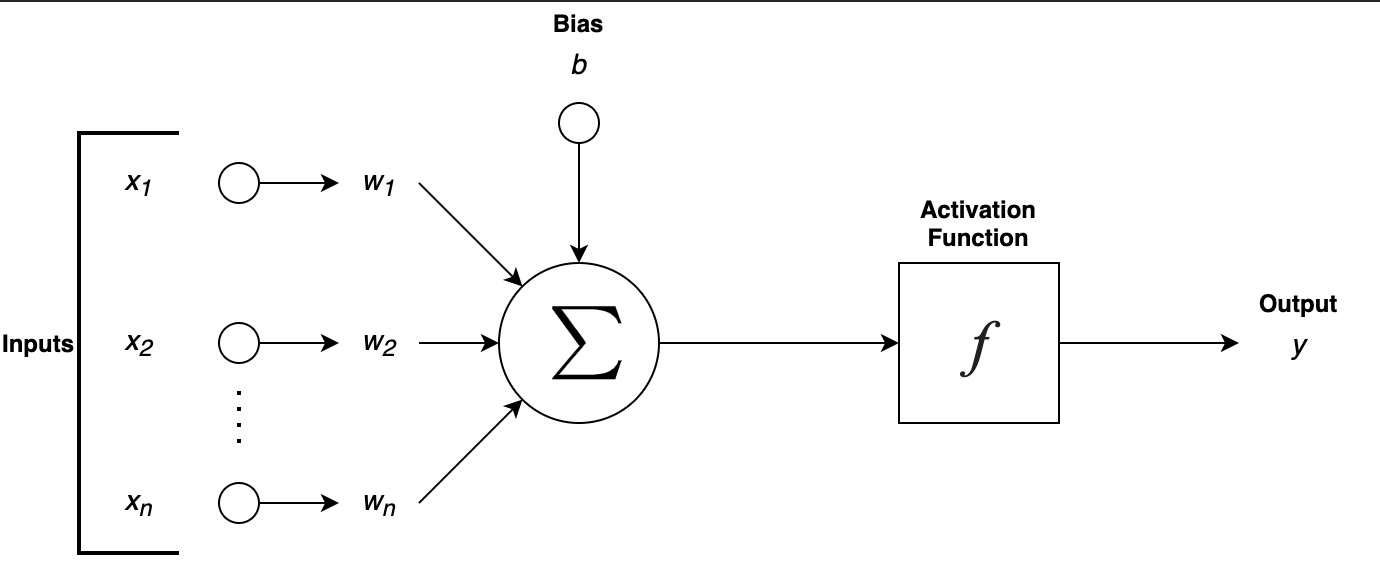

## Simple Artificial Neural Networks

ANNs are very powerful and have shown great results in several industries, including medicine, banking and online shopping. The true power and potential of ANNs depends on the quality of the data fed into them, and the architectural design of the ANN.  

### In Groups - Discuss (10 mins): 

In groups, discuss the “best” solution for designing the ANN. Draw your solutions on the whiteboard (at your table in Remo): 

1. Design a single layer Neural Network (assume bias = 0) 
  * Inputs: 5, 6, 7, 4, 3, 5 
  * Output: 30 
  * What are the weights and the activation function?

2. The weights do not have to be the same for all nodes. There may be a formula to determine the weights (for example, all data above 100 has a weight of 0.6), or they may be random. 
  * Inputs: 5, 6, 7, 4, 3, 5 
  * Output: 37 
  * This can be designed in multiple ways (different weights, net input function, bias not = 0, activation functions). Find a few. 

3. How would you design a Neural Network to work out whether students pass or fail the year? Students must get above 40% in all six modules. 
  * What data would you need? 

Hopefully this has shown how many considerations there are when designing an ANN.  

### Coding (30 mins):

1. Look at the Simple ANN code example below. It is the code for the very simple Neural Network below. With weights equal at each level, bias = 1 and activation function = identity function (multiply by 1). 

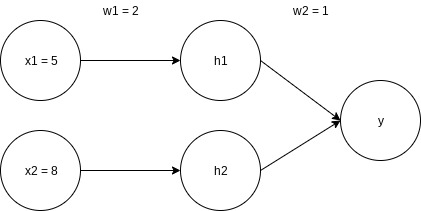

2. Change the numbers and rerun to try and understand the code. Try to understand what the changes mean for the ANN.

3. Can you use this code to create your first Neural Network? 

4. Can you code the ANN in the figure below?  

  - Extra: add a final activation function tanh 

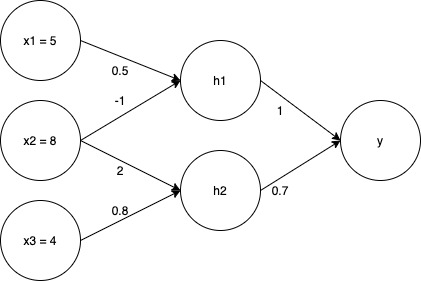

Simple ANN Coding Example:

In [ ]:
# import the library we will be using tensorflow
import tensorflow as tf

In [ ]:
# TensorFlow constant (these are the weights)
w1 = tf.constant(2.0, name="w1")
w2 = tf.constant(1.0, name="w2")
    
# TensorFlow variables (these are the input variables)
x1 = tf.Variable(5.0, name='x1')
x2 = tf.Variable(8.0, name='x2')

In [ ]:
# operations (this calculates the weighted sum)
h1 = tf.multiply(w1, x1 , name='h1')
h2 = tf.multiply(w1, x2, name='h2')

In [ ]:
y = tf.add(tf.multiply(w2,h1), tf.multiply(w2, h2)) # this adds up the two nodes

In [ ]:
y.numpy() # the answer is numpy = ANSWER

26.0

## Complex Artificial Neural Networks

### Lecture Review - Types of Artificial Neural Network 

There are multiple types of ANN architecture and these different types work well for different types of data and problems. Make sure you understand these types and what they can be used for (and any others that are covered in the lecture) 

* Feedforward (or simple) 

* Deep 

* Recurrent  

* Convolutional  

### In Groups - Discuss (10 mins): 

Discuss which type of ANN would work for the following real-world examples: 

* Autonomous cars avoiding crashes  

* Whether someone will get a disease

* Deciding whether to give someone a mortgage  

* The impact of climate change on global temperatures and rainfall 

In each case, think about what data will be needed for inputs, what output you want and what type of neural network would be best suited.  Also, consider if an ANN is needed for this type of problem. 

Record your answers on this [Miro board](https://miro.com/welcomeonboard/piygyIcNlp8l95N0JdduUo9jCiWpaLkNDFasNxt9Vy8Ga8R0jnQiuWv6DWVYkdc8).

## Working With Real Data 

### Lecture Review – Train, Test and Validation 

Data needs to split into two or three separate groups. Make sure you understand what each group is for, and how much data should be assigned to each one: 

* Train 

* Test 

* Validation 

A lot of work also needs to go into preparing data to be used in ANNs, as bad data gets bad results. Luckily, a lot of already cleaned, sorted and prepared datasets exist for learning. 

### Coding (30 mins)

One very famous dataset is the MNIST dataset. It contains 70,000 images of handwritten letters (60,000 for training and 10,000 for testing). More about the dataset and some examples of where it has been used in academic research can be found here: http://yann.lecun.com/exdb/mnist/ 

Below is some code which trains an ANN on the MNIST dataset.

Try to understand the code and what the final output is saying (the tutorial is based on this if you need help: https://www.tensorflow.org/tutorials/quickstart/beginner) 


### Code

In [ ]:
# Install TensorFlow
import tensorflow as tf

In [ ]:
# Import the dataset
mnist = tf.keras.datasets.mnist

The MNIST dataset is already split into test and train data, we can load these into variables with the following code:

In [ ]:
# Split into test and train
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


For ANN, we often want to use normalised data (with values between 0 and 1). Greyscale images, like those in the MNIST dataset, can take values between 0 and 255 (which represent black and white respectively). Therefore, we can normalise the data by dividing by 255.

In [ ]:
# Normalise the data
x_train, x_test = x_train / 255.0, x_test / 255.0

We will use [Keras](https://keras.io/) within tensorflow, which is supposed to help the code be more human readable (and therefore easier for us to write). In the code below, we define the architecture of the ANN. Let's look at each line more closely:

`model = tf.keras.models.Sequential([  ` - [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) means we are defining a feedforward ANN

  `tf.keras.layers.Flatten(input_shape=(28, 28)),` defines the first layer of the ANN. The input data is the handwriting images, which have 28x28 pixels with each pixel representing a data point. Each image is fed into the ANN one at a time. Flatten is used to flatten the 3D input without impacting the size.
  
  `tf.keras.layers.Dense(128, activation='relu'),` defines another layer of the ANN. [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) describes a standardly densely connected ANN layer. The number is the units, or number of nodes in this layer. This layer also has an activation function *relu* which performs the function *max(x, 0)*. This is a *hidden* layer of the ANN.
  
  `tf.keras.layers.Dropout(0.2),` specificing a dropout rate of 20%. A dropout is when neurons in the ANN are randomly chosen to be excluded from the training of the ANN. Dropout makes the ANN less sensitive to the weights of each neuron. Using randomly dropout creates a more generalisible ANN and is less likely to be overfit to our specific data.
  
  `tf.keras.layers.Dense(10, activation='softmax')` adding a final layer with 10 nodes and a [softmax activation function](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax).

`])`


In [ ]:
# Set out the architecture of the Neural Nework 
model = tf.keras.models.Sequential([ 
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.Dense(10, activation='softmax')
])

Next we want to compile the model (or get it ready for training). The code below is used to compile our model, let's go through it line by line:

`model.compile(optimizer='adam',` The optimizer explains the formula for learning (in this case, the Adam formula, which is very popular).

 `loss='sparse_categorical_crossentropy',` Loss defines the weights for the loss function. The loss function calculates the error in our ANN compared to the training data. We are trying to minimise the loss function. Sparse categorical crossentropy calculates the error between the labels and predictions (is this case which letter the handwriting image represented).

 `metrics=['accuracy'])` Metrics are what is tested throughout the learning process. These can be more complicated, but we will just be using accuracy which runs the model for test data and gives a percentage of how many datapoints were correctly classified. The closer to 100%, the better.

Other arguments which can be used within the compile function can be found on [this page](https://www.tensorflow.org/api_docs/python/tf/keras/Model), and scroll down to the compile section.



In [ ]:
# Create the model
model.compile(optimizer='adam', # optimizer explains the formula for learning
              loss='sparse_categorical_crossentropy', # loss defines the weights for the loss function
              metrics=['accuracy']) # metrics are what is tested throughout the learning process

The fit function can be used to train the model to our training data.

The epochs is how many times the data is run through the model. In this example, the model will be fit 5 times. 

However, it might be useful in real life to add some code to stop training the model if the metrics get worse.

In [ ]:
# Fit the model to the training data
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2917 - accuracy: 0.9148
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1379 - accuracy: 0.9587
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1042 - accuracy: 0.9689
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0865 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0708 - accuracy: 0.9778


In the above output, each epoch (out of 5) runs for each of the 1,875 training images.

The time is recorded, as is the loss (which we want to minimise) and the accuracy (which we want to maximise).

As the code runs, the progress bar for each epoch fills.

Finally, we evaluate our ANN by running the test data through the model.

Verbose explains how much output we want from our evaluation (try changing this to 0 or 2 to see).

In [ ]:
# Compare the model to test data
model.evaluate(x_test,  y_test, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9809


[0.06859897077083588, 0.98089998960495]

After running the 313 test data images through the model, we get loss and accuracy numbers. These can be compared to the loss and accuracy numbers from the training data to check for overfitting to the training data. 

In the example, the test data has a higher accuracy than the training data, and a lower loss function.

### Coding Task

Edit the Neural Network to see if you can improve the results: 

1. Change the number of nodes on the hidden layers 

2. Add additional layers (Hint: to add another standard layer, add a new line with [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) as in the code above).

3. Change the [activation functions](https://www.tensorflow.org/api_docs/python/tf/keras/activations) 

4. Extra: change the [optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers), [loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses) and [dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) 

Hopefully you are now starting to understand how an ANN can be built in Tensorflow. If you had another example of images you wanted to train an ANN on, you could reuse this code (changing the file, the image size and the number of beginning nodes) and fingers crossed it should run. The results may not be extremely useful without some architectural tweaks though. 

This may seem like a very simple, and potentially pointless, exercise in ANNs, but it is important to consider this as a building block for more impressive projects. Handwriting analysis, such as this, is used in a number of everyday applications: 

* Signing for packages (if they checked signatures). 

* Writing on a tablet and this being understood (this is used a lot in education and for people with disabilities).  

A more advanced use of this handwriting analysis is in understanding lost languages. This technology has been used to read ancient documents and inscribing that were once thought lost. It has also been used to convert Native American/Canadian languages into the digital form, allowing new techy-savvy generations to learn. 

## Ethics 

### In Groups - Discuss (5 mins): 

There is a lot to be considered whenever any Machine Learning or Artificial Intelligence is being use. In groups discuss how these apply when ANNs are used: 

* Bias 

* Privacy 

* Inequality 

* Explainability (“Black-Box”) 

* Applications (facial recognition, job interviews, medical screening, etc). 

* Are there any other ethical concerns which need to be consider? 

Please post one ethical consideration about ANNs in [this padlet](https://padlet.com/sabinehauert/kteb3wvccuow1hj1).

## If You Want to Learn More: 

Tensorflow Tutorials - https://www.tensorflow.org/tutorials/ 

Tensorflow Playground - https://playground.tensorflow.org/ 

Kaggle - https://www.kaggle.com/ 

Using Google’s resources for your own projects. Google have very kindly created Google Colaboratory (https://colab.research.google.com/), which is an amazing in-browser way to run Python code on Google Severs. It saves having to install modules on your computer or setting up virtual environments, and it’s easy to share and collaborate with other (hence the name). As with all Google products, be sure to understand the Terms and Conditions before using any sensitive or confidential data or code. 